# INTEL IMAGE CLASSIFICATION

## IMPORTING AND DOWNLOADING LIBRARIES



In [ ]:
!nvidia-smi

Sun Jan  8 02:29:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    29W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import losses

## DOWNLOADING DATASET

In [ ]:
import opendatasets as od
url = "https://www.kaggle.com/datasets/puneet6060/intel-image-classification"
data = od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ace991
Your Kaggle Key: ··········


100%|██████████| 346M/346M [00:02<00:00, 157MB/s]


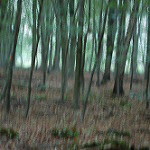

In [ ]:
load_img('/content/intel-image-classification/seg_train/seg_train/forest/10020.jpg')

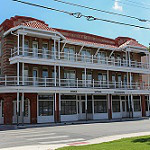

In [ ]:
load_img('/content/intel-image-classification/seg_train/seg_train/buildings/1001.jpg')


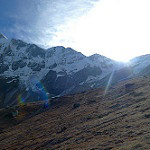

In [ ]:
load_img('/content/intel-image-classification/seg_train/seg_train/glacier/10009.jpg')

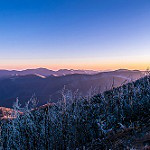

In [ ]:
load_img('/content/intel-image-classification/seg_train/seg_train/mountain/10001.jpg')

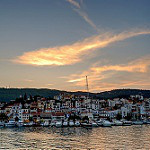

In [ ]:
load_img('/content/intel-image-classification/seg_train/seg_train/sea/15808.jpg')

## CREATING DATASET

In [ ]:
np.shape(Image.open('/content/intel-image-classification/seg_train/seg_train/street/14486.jpg'))

(150, 150, 3)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dir = '/content/intel-image-classification/seg_train/seg_train'
test_dir = '/content/intel-image-classification/seg_test/seg_test'

In [ ]:
train_ds = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    shuffle=True)

Found 14034 images belonging to 6 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
val_ds = val_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=32,
                                                class_mode='categorical',
                                                shuffle=True)

Found 3000 images belonging to 6 classes.


In [ ]:
train_ds.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [ ]:
class_names = train_ds.class_indices
class_names = list(class_names.keys())
print(class_names)


['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


## MODEL BUILDING

In [ ]:
model = keras.models.Sequential()
model.add(layers.Conv2D(16,(3,3),padding='same',activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(6,activation='softmax'))

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),loss=losses.CategoricalCrossentropy(),metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

## MODEL TRAINING

In [ ]:
epochs = 20
training = model.fit(train_ds,
                     epochs=epochs,
                     batch_size=32,
                     validation_data=val_ds)

Epoch 1/20
439/439 [==============================] - 36s 62ms/step - loss: 0.9339 - acc: 0.6417 - val_loss: 0.6843 - val_acc: 0.7497
Epoch 2/20
439/439 [==============================] - 22s 51ms/step - loss: 0.6310 - acc: 0.7693 - val_loss: 0.6376 - val_acc: 0.7627
Epoch 3/20
439/439 [==============================] - 22s 51ms/step - loss: 0.4765 - acc: 0.8286 - val_loss: 0.4976 - val_acc: 0.8227
Epoch 4/20
439/439 [==============================] - 23s 52ms/step - loss: 0.3838 - acc: 0.8613 - val_loss: 0.5056 - val_acc: 0.8277
Epoch 5/20
439/439 [==============================] - 22s 51ms/step - loss: 0.3005 - acc: 0.8935 - val_loss: 0.4553 - val_acc: 0.8483
Epoch 6/20
439/439 [==============================] - 22s 50ms/step - loss: 0.2211 - acc: 0.9210 - val_loss: 0.5074 - val_acc: 0.8467
Epoch 7/20
439/439 [==============================] - 22s 50ms/step - loss: 0.1608 - acc: 0.9421 - val_loss: 0.6168 - val_acc: 0.8297
Epoch 8/20
439/439 [==============================] - 22s 50ms

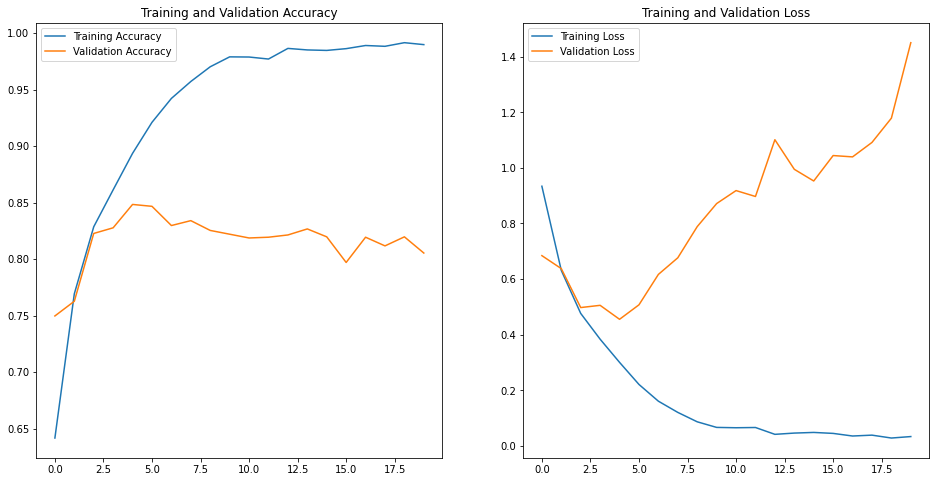

In [ ]:
acc = training.history['acc']
val_acc = training.history['val_acc']

loss = training.history['loss']
val_loss = training.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')
plt.show()


#### The plots show that training accuracy and validation accuracy are off by large margins, and the model has achieved only around 80% accuracy on the validation set.To better the model we will need to add dropout and augment the data therefore countering the overfitting and increase in validation loss.

## Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   shear_range=0.2,
                                   zoom_range=0.4
)

In [ ]:
train_ds = train_datagen.flow_from_directory(train_dir,
                                             target_size=(150, 150),
                                             batch_size=64,
                                             class_mode='categorical',
                                             shuffle=True)

Found 14034 images belonging to 6 classes.


In [ ]:
val_ds = val_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=32,
                                                class_mode='categorical',
                                                shuffle=True)

Found 3000 images belonging to 6 classes.


In [ ]:
model.save_weights('model_v1.h5', save_format='h5')

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'intel_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

## Tuning the model

In [ ]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(6,activation='softmax'))

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),loss=losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 37, 37, 64)       256       
 ormalization)                                                   
                                                      

In [ ]:
epochs = 100
training = model.fit(train_ds,
                     epochs=epochs,
                     batch_size=64,
                     validation_data=val_ds,
                     callbacks=[checkpoint])

Epoch 1/100
220/220 [==============================] - 85s 379ms/step - loss: 1.1999 - accuracy: 0.5102 - val_loss: 1.4958 - val_accuracy: 0.5713
Epoch 2/100
220/220 [==============================] - 82s 373ms/step - loss: 0.8717 - accuracy: 0.6608 - val_loss: 0.9939 - val_accuracy: 0.6813
Epoch 3/100
220/220 [==============================] - 83s 377ms/step - loss: 0.7627 - accuracy: 0.7189 - val_loss: 0.7122 - val_accuracy: 0.7690
Epoch 4/100
220/220 [==============================] - 82s 372ms/step - loss: 0.6944 - accuracy: 0.7435 - val_loss: 0.6751 - val_accuracy: 0.7483
Epoch 5/100
220/220 [==============================] - 82s 373ms/step - loss: 0.6592 - accuracy: 0.7551 - val_loss: 0.8023 - val_accuracy: 0.7100
Epoch 6/100
220/220 [==============================] - 83s 379ms/step - loss: 0.6234 - accuracy: 0.7723 - val_loss: 0.6647 - val_accuracy: 0.7587
Epoch 7/100
220/220 [==============================] - 82s 371ms/step - loss: 0.5759 - accuracy: 0.7858 - val_loss: 0.5509 -

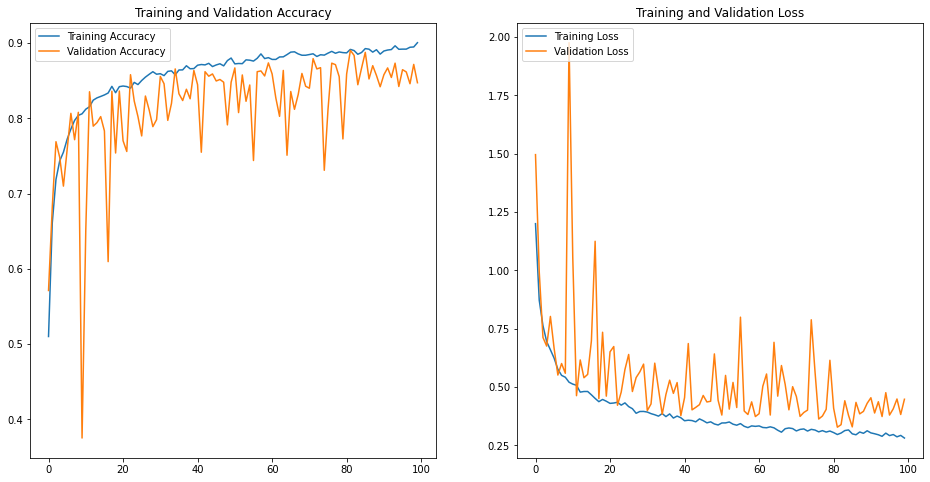

In [ ]:
acc = training.history['accuracy']
val_acc = training.history['val_accuracy']

loss = training.history['loss']
val_loss = training.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')
plt.show()


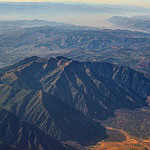

In [ ]:
import random
import os
folder_path = '/content/intel-image-classification/seg_pred/seg_pred'
files = os.listdir(folder_path)
d = random.choice(files)
load_img(folder_path + '/' + d)

In [ ]:
model = keras.models.load_model('/content/intel_v1_82_0.890.h5')

1/1 [==============================] - 0s 16ms/step
{'buildings': 1.0, 'forest': 0.0, 'glacier': 0.0, 'mountain': 0.0, 'sea': 0.0, 'street': 0.0} 
 This image most likely belongs to buildings


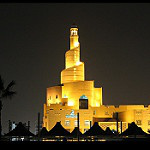

In [ ]:
import random
import os
folder_path = '/content/intel-image-classification/seg_pred/seg_pred'
files = os.listdir(folder_path)
rimg = random.choice(files)

img = tf.keras.utils.load_img(
    folder_path + '/' + rimg, target_size=(150, 150))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    dict(zip(class_names, predictions[0])),
    "\n This image most likely belongs to {}"
    .format(class_names[np.argmax(score)])
)
load_img(folder_path + '/' + rimg)